In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

In [53]:
pd.options.display.float_format = '{0:.4f}'.format
sns.set(rc={'figure.figsize':(20,20)})

In [54]:
PWD = r"C:\Users\Desktop\sales"

train_file = os.path.join(PWD, "sales_train.csv")
test_file = os.path.join(PWD, "test.csv")

items_file = os.path.join(PWD, "items.csv")
item_categories_file = os.path.join(PWD, "item_categories.csv")
shops_file = os.path.join(PWD, "shops.csv")

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

items_df = pd.read_csv(items_file)
item_categories_df = pd.read_csv(item_categories_file)
shops_df = pd.read_csv(shops_file)

In [55]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0000,1.0000
1,03.01.2013,0,25,2552,899.0000,1.0000
2,05.01.2013,0,25,2552,899.0000,-1.0000
3,06.01.2013,0,25,2554,1709.0500,1.0000
4,15.01.2013,0,25,2555,1099.0000,1.0000


In [56]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.0000,2935849.0000,2935849.0000,2935849.0000,2935849.0000
mean,14.5699,33.0017,10197.2271,890.8532,1.2426
std,9.4230,16.2270,6324.2974,1729.7996,2.6188
min,0.0000,0.0000,0.0000,-1.0000,-22.0000
25%,7.0000,22.0000,4476.0000,249.0000,1.0000
50%,14.0000,31.0000,9343.0000,399.0000,1.0000
75%,23.0000,47.0000,15684.0000,999.0000,1.0000
max,33.0000,59.0000,22169.0000,307980.0000,2169.0000


In [57]:
print(train_df.dtypes)

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [58]:
print("Number of shops:", train_df["shop_id"].nunique())
print("Number of items:", train_df["item_id"].nunique())

Number of shops: 60
Number of items: 21807


In [59]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [60]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [61]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [62]:
all_train_df = train_df.merge(items_df, on="item_id")
all_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37


In [63]:
print(train_df["item_id"].head())

0    22154
1     2552
2     2552
3     2554
4     2555
Name: item_id, dtype: int64


In [64]:
print(all_train_df.iloc[3])
print("---")
bool_list = (train_df["item_id"] == 22154) & \
    (train_df["shop_id"] == 25) & \
    (train_df["date_block_num"] == 0) & \
    (train_df["date"] == "02.01.2013")

print(type(bool_list))
print('---')
print(len(bool_list))
print(type(bool_list[0]))
print('---')
print(bool_list.head())
print('---')
r = train_df[bool_list]

print(r)

date                       02.01.2013
date_block_num                      0
shop_id                            25
item_id                         22154
item_price                   999.0000
item_cnt_day                   1.0000
item_name           ЯВЛЕНИЕ 2012 (BD)
item_category_id                   37
Name: 3, dtype: object
---
<class 'pandas.core.series.Series'>
---
2935849
<class 'numpy.bool_'>
---
0    False
1    False
2    False
3    False
4    False
dtype: bool
---
             date  date_block_num  shop_id  item_id  item_price  item_cnt_day
25918  02.01.2013               0       25    22154    999.0000        1.0000


In [65]:
all_train_df = all_train_df.merge(item_categories_df, on="item_category_id")
all_train_df = all_train_df.merge(shops_df, on="shop_id")
all_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0000,1.0000,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0000,1.0000,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5000,1.0000,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5000,1.0000,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0000,2.0000,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [66]:
all_train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2935849.0000,2935849.0000,2935849.0000,2935849.0000,2935849.0000,2935849.0000
mean,14.5699,33.0017,10197.2271,890.8532,1.2426,40.0014
std,9.4230,16.2270,6324.2974,1729.7996,2.6188,17.1008
min,0.0000,0.0000,0.0000,-1.0000,-22.0000,0.0000
25%,7.0000,22.0000,4476.0000,249.0000,1.0000,28.0000
50%,14.0000,31.0000,9343.0000,399.0000,1.0000,40.0000
75%,23.0000,47.0000,15684.0000,999.0000,1.0000,55.0000
max,33.0000,59.0000,22169.0000,307980.0000,2169.0000,83.0000


In [67]:
train_groupby_date_block_num = all_train_df.groupby("date_block_num")

In [68]:
total_item_sales_per_month = train_groupby_date_block_num["item_cnt_day"].sum()
print(total_item_sales_per_month)

date_block_num
0    131479.0000
1    128090.0000
2    147142.0000
3    107190.0000
4    106970.0000
5    125381.0000
6    116966.0000
7    125291.0000
8    133332.0000
9    127541.0000
10   130009.0000
11   183342.0000
12   116899.0000
13   109687.0000
14   115297.0000
15    96556.0000
16    97790.0000
17    97429.0000
18    91280.0000
19   102721.0000
20    99208.0000
21   107422.0000
22   117845.0000
23   168755.0000
24   110971.0000
25    84198.0000
26    82014.0000
27    77827.0000
28    72295.0000
29    64114.0000
30    63187.0000
31    66079.0000
32    72843.0000
33    71056.0000
Name: item_cnt_day, dtype: float64


In [69]:
print(total_item_sales_per_month.index)
print(type(total_item_sales_per_month.index))

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33],
           dtype='int64', name='date_block_num')
<class 'pandas.core.indexes.numeric.Int64Index'>


C:\Users\bojia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


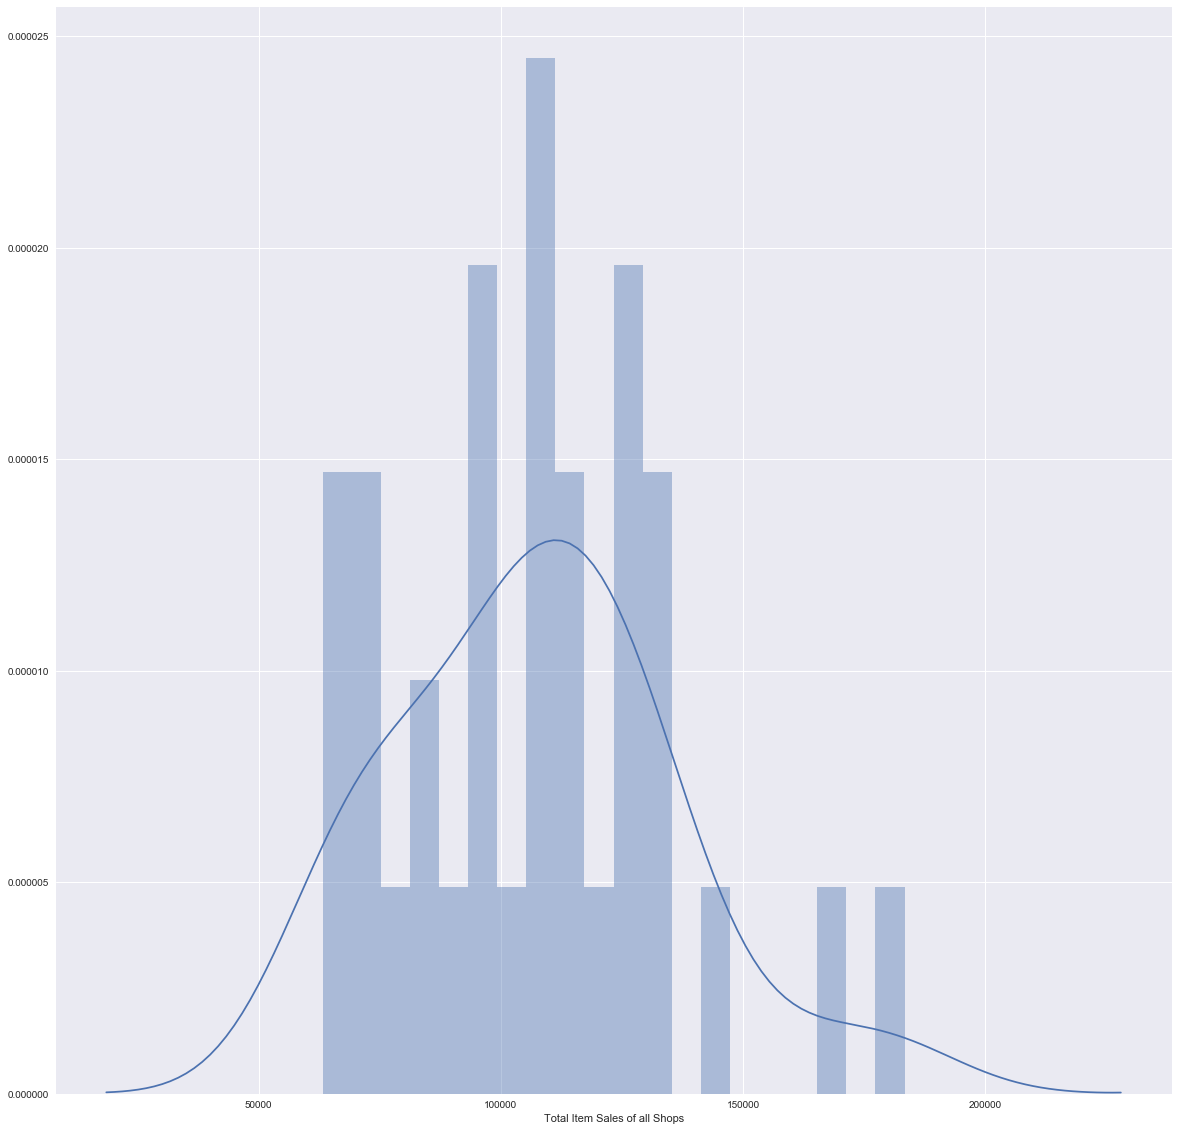

In [70]:
sns.distplot(total_item_sales_per_month, bins=20, axlabel="Total Item Sales of all Shops")

The total item sales distrubtion looks like a normal distrubtion 

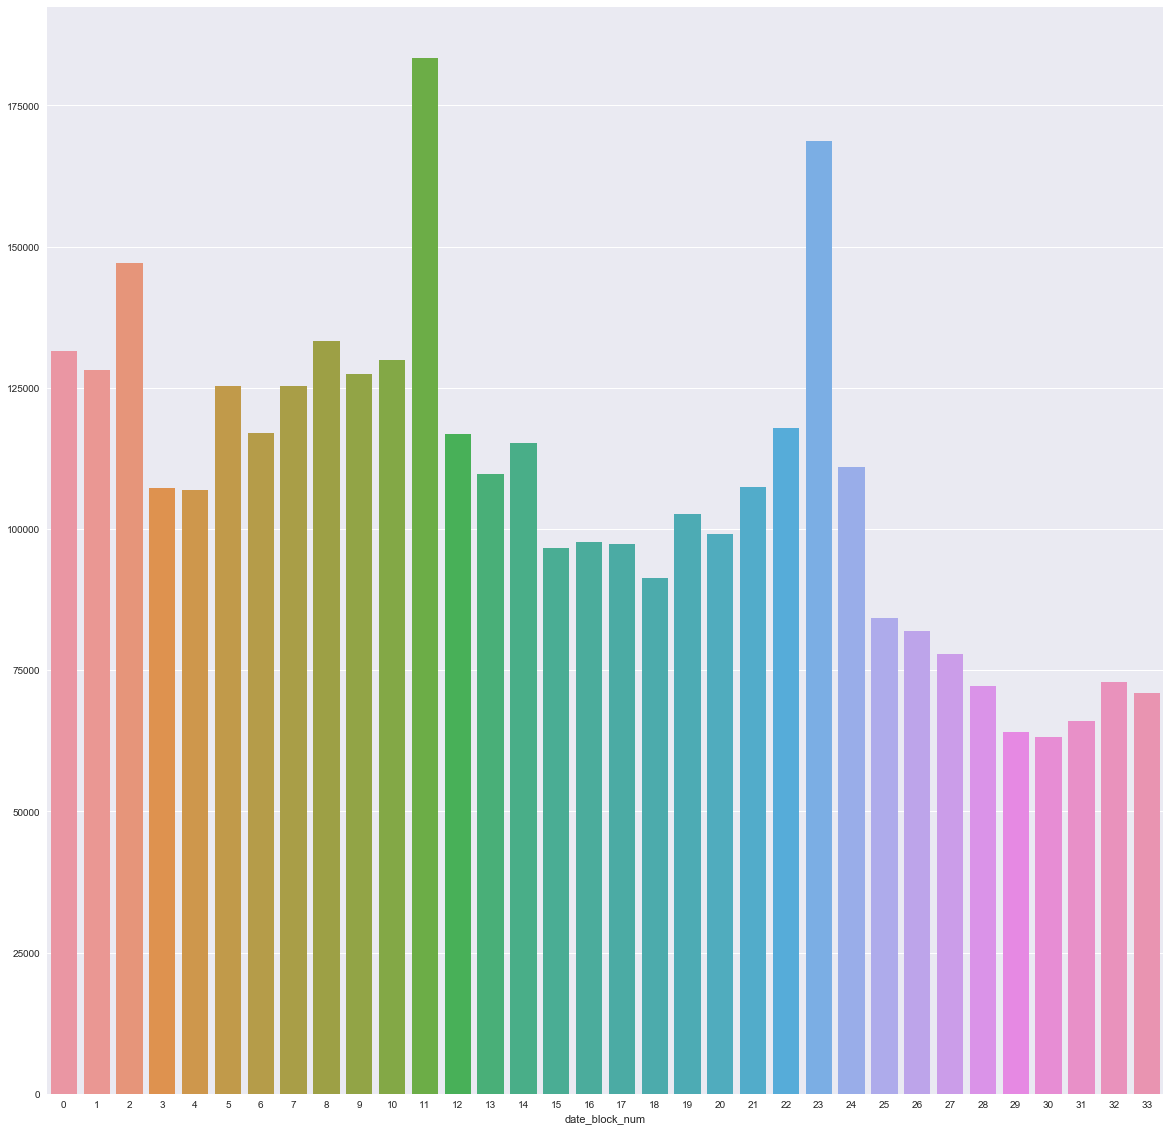

In [71]:
sns.barplot(x=total_item_sales_per_month.index, y=total_item_sales_per_month.values)


The sales against months has a periodic pattern. In a year, higher in the beginning and ending of the year, lower in the mid year.

In [72]:
month_vs_shop_sales = all_train_df.groupby(["date_block_num", "shop_id"])["item_cnt_day"].sum()

In [73]:
month_vs_shop_sales = month_vs_shop_sales.reset_index()
print(type(month_vs_shop_sales))
print(month_vs_shop_sales.head())


<class 'pandas.core.frame.DataFrame'>
   date_block_num  shop_id  item_cnt_day
0               0        0     5578.0000
1               0        1     2947.0000
2               0        2     1146.0000
3               0        3      767.0000
4               0        4     2114.0000


In [74]:
mvs_wide = month_vs_shop_sales.pivot(index="shop_id", columns="date_block_num", values="item_cnt_day")

In [75]:
mvs_wide

date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
shop_id,,,,,,,,,,,,,,,,,,,,,
0,5578.0000,6127.0000,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2947.0000,3364.0000,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1146.0000,488.0000,753.0000,583.0000,553.0000,832.0000,807.0000,875.0000,945.0000,795.0000,...,987.0000,907.0000,762.0000,859.0000,843.0000,804.0000,785.0000,942.0000,822.0000,727.0000
3,767.0000,798.0000,959.0000,647.0000,710.0000,784.0000,721.0000,890.0000,1026.0000,793.0000,...,977.0000,738.0000,741.0000,740.0000,731.0000,672.0000,535.0000,666.0000,745.0000,613.0000
4,2114.0000,2025.0000,2060.0000,285.0000,1211.0000,1464.0000,1378.0000,1713.0000,1536.0000,1482.0000,...,1188.0000,980.0000,978.0000,899.0000,893.0000,793.0000,842.0000,947.0000,732.0000,831.0000
5,nan,877.0000,1355.0000,1008.0000,1110.0000,1393.0000,1265.0000,1510.0000,1298.0000,1267.0000,...,1404.0000,1101.0000,1109.0000,1054.0000,1012.0000,954.0000,991.0000,1294.0000,1092.0000,1052.0000
6,3686.0000,4007.0000,4519.0000,3168.0000,3022.0000,3847.0000,3360.0000,3702.0000,4208.0000,3675.0000,...,2328.0000,2329.0000,1981.0000,1998.0000,1748.0000,1539.0000,1484.0000,1575.0000,1725.0000,1802.0000
7,2495.0000,2513.0000,2460.0000,1540.0000,1647.0000,2085.0000,2031.0000,2397.0000,2599.0000,2236.0000,...,2084.0000,1847.0000,1430.0000,1340.0000,1217.0000,1235.0000,1327.0000,1409.0000,1287.0000,1212.0000
8,1463.0000,1156.0000,977.0000,-1.0000,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


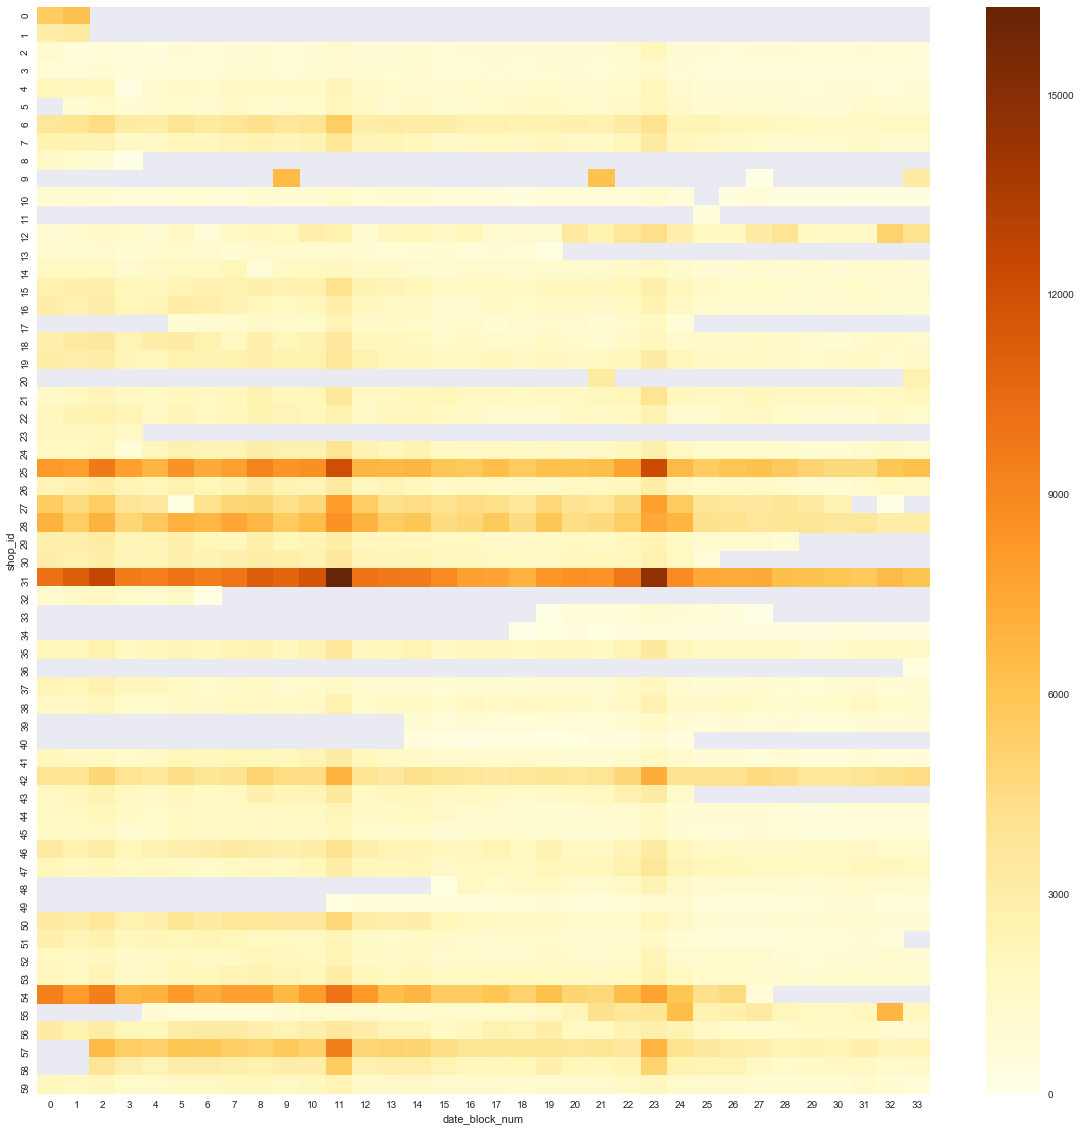

In [76]:
sns.heatmap(mvs_wide, cmap='YlOrBr')

Per shop sales against months. Similar periodic pattern can be observed like the total sales against months, but some shops like id 24, 30 are selling much better than others.

Those well selling shops tend to have close IDs. 

Some shops has no selling record in some months and those missing months are tend to continoues.

In [77]:
month_vs_cate_sales = all_train_df.groupby(["date_block_num", "item_category_id"])\
    ["item_cnt_day"].sum().reset_index()
print(month_vs_cate_sales.head())

   date_block_num  item_category_id  item_cnt_day
0               0                 0        1.0000
1               0                 1        1.0000
2               0                 2     1390.0000
3               0                 3      440.0000
4               0                 4      251.0000


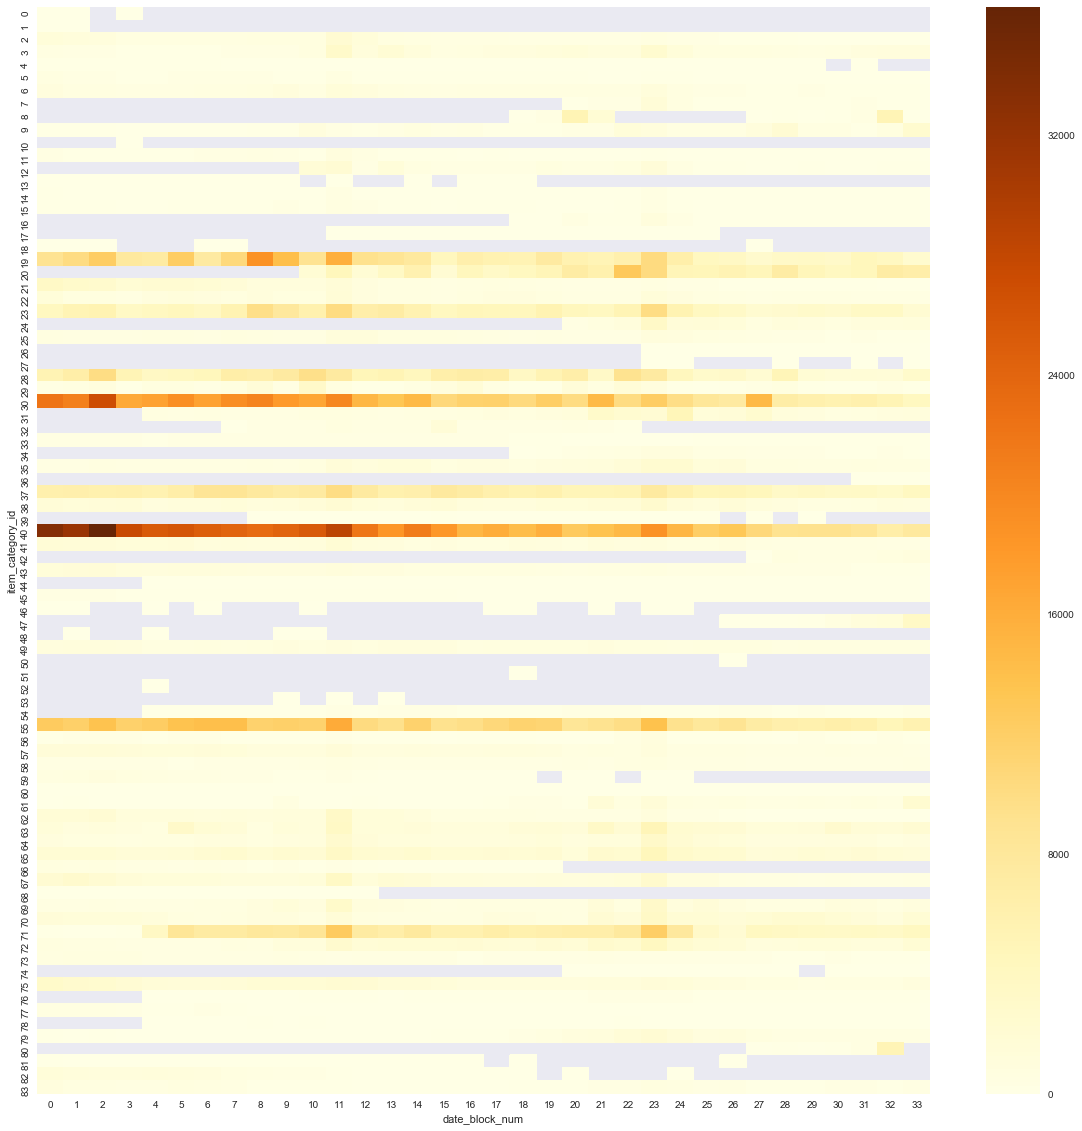

In [79]:
mvc_wide = month_vs_cate_sales.pivot(index="item_category_id", columns="date_block_num", values="item_cnt_day")
sns.heatmap(mvc_wide, cmap="YlOrBr")

Category 40 sells very good. Also has a pattern with high sales at month 0, and decrease gradually to the 33th month.
Category 28 seems sell better in March. 

Seems like has 3 types of patterns:
- Few categories like 71, 65 have periodic pattern annually.
- Few categories like 40, 55 have a gradual decreasing pattern.
- Other categories are pretty stable across this 33 months period.


Some categories have continous missing records. Have to handle.


In [81]:
shop_vs_cate_sales = all_train_df.groupby(["shop_id", "item_category_id"])\
    ["item_cnt_day"].sum().reset_index()
print(shop_vs_cate_sales.head())

   shop_id  item_category_id  item_cnt_day
0        0                 0        1.0000
1        0                 1        1.0000
2        0                 2      105.0000
3        0                 3       52.0000
4        0                 4       38.0000


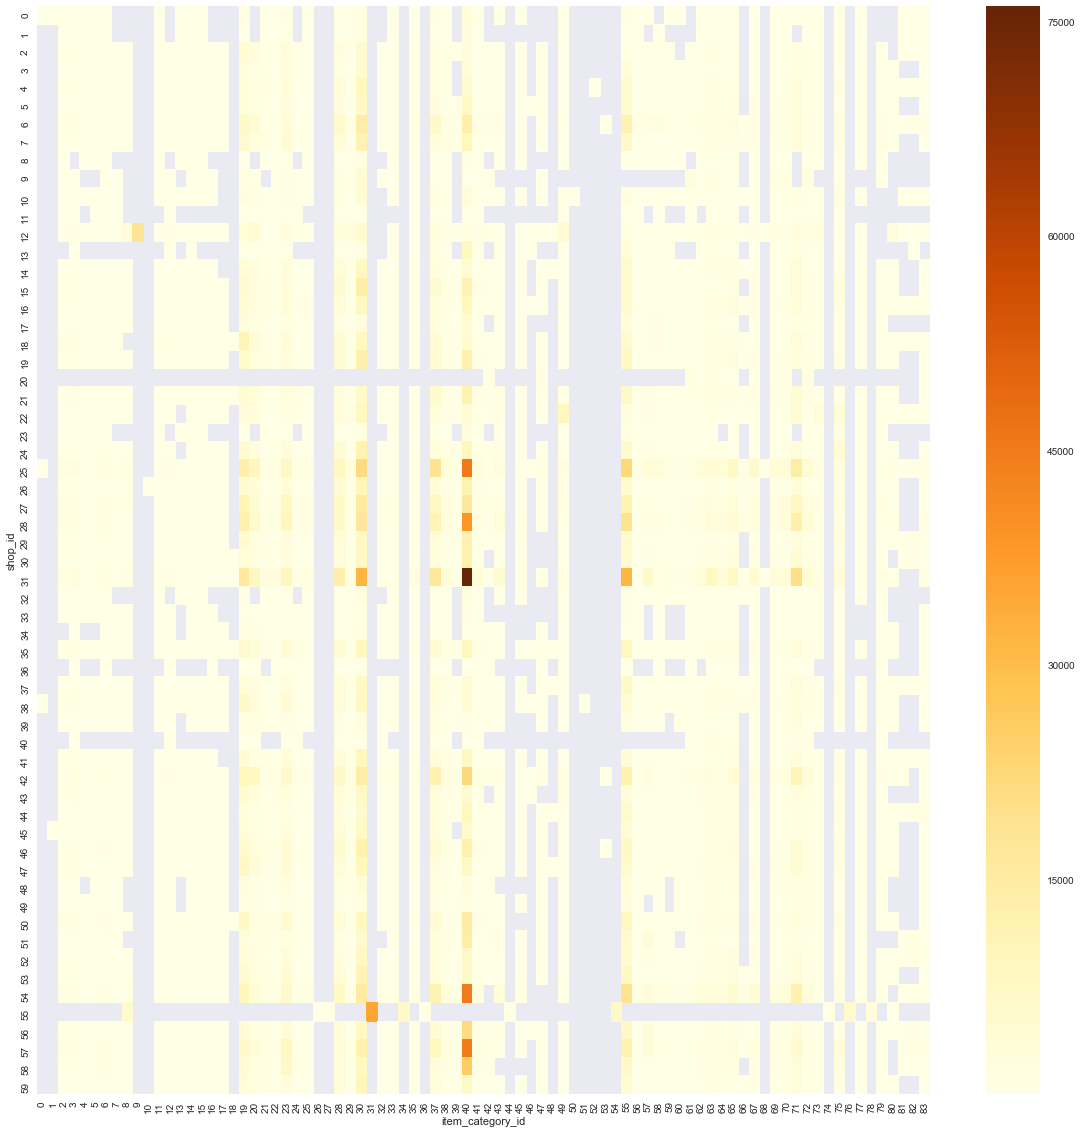

In [82]:
svc_wide = shop_vs_cate_sales.pivot(index="shop_id", columns="item_category_id", values="item_cnt_day")
sns.heatmap(svc_wide, cmap="YlOrBr")

For each shop, sales pattern of categories looks similar.

Hot shops like 31, tend to sell a lot of hot categories like 40. I.e. People like to buy hot categories at hot shops.

Some categories like 31, 54, are selling excluively in certain shop like 55. 

No shop sells all categories. Also no category sold by all shops.



In [84]:
shop_sales_rank = all_train_df.groupby("shop_id")["item_cnt_day"].sum()
print(shop_sales_rank.head())
print("--- Distrubtion of Shop sales rank ---")
print(shop_sales_rank.describe())

shop_id
0   11705.0000
1    6311.0000
2   30620.0000
3   28355.0000
4   43942.0000
Name: item_cnt_day, dtype: float64
--- Distrubtion of Shop sales rank ---
count       60.0000
mean     60803.4333
std      57992.9018
min        330.0000
25%      23333.0000
50%      50176.0000
75%      69562.2500
max     310777.0000
Name: item_cnt_day, dtype: float64


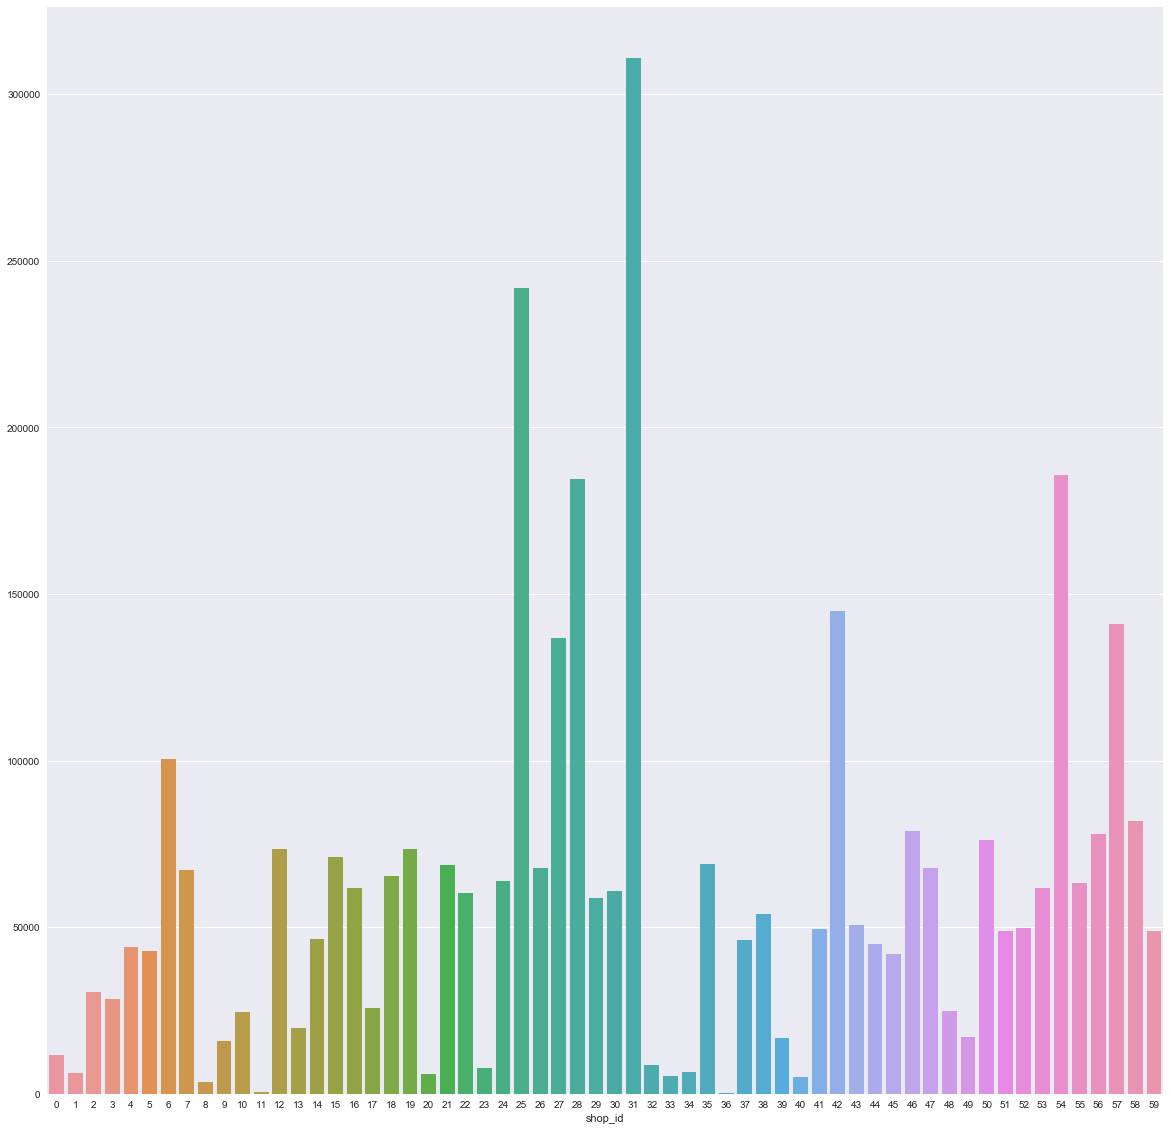

In [85]:
sns.barplot(x=shop_sales_rank.index, y=shop_sales_rank.values)

Seems good selling shops have closer IDs. Few clusters like 6, 28, 42, 54, can be observed. The IDs have geograhpical relation?

In [86]:
month_cate_wide = month_vs_cate_sales.pivot(index="date_block_num", columns="item_category_id", values="item_cnt_day"                                           )

In [87]:
cate_corr_matrix = month_cate_wide.corr()

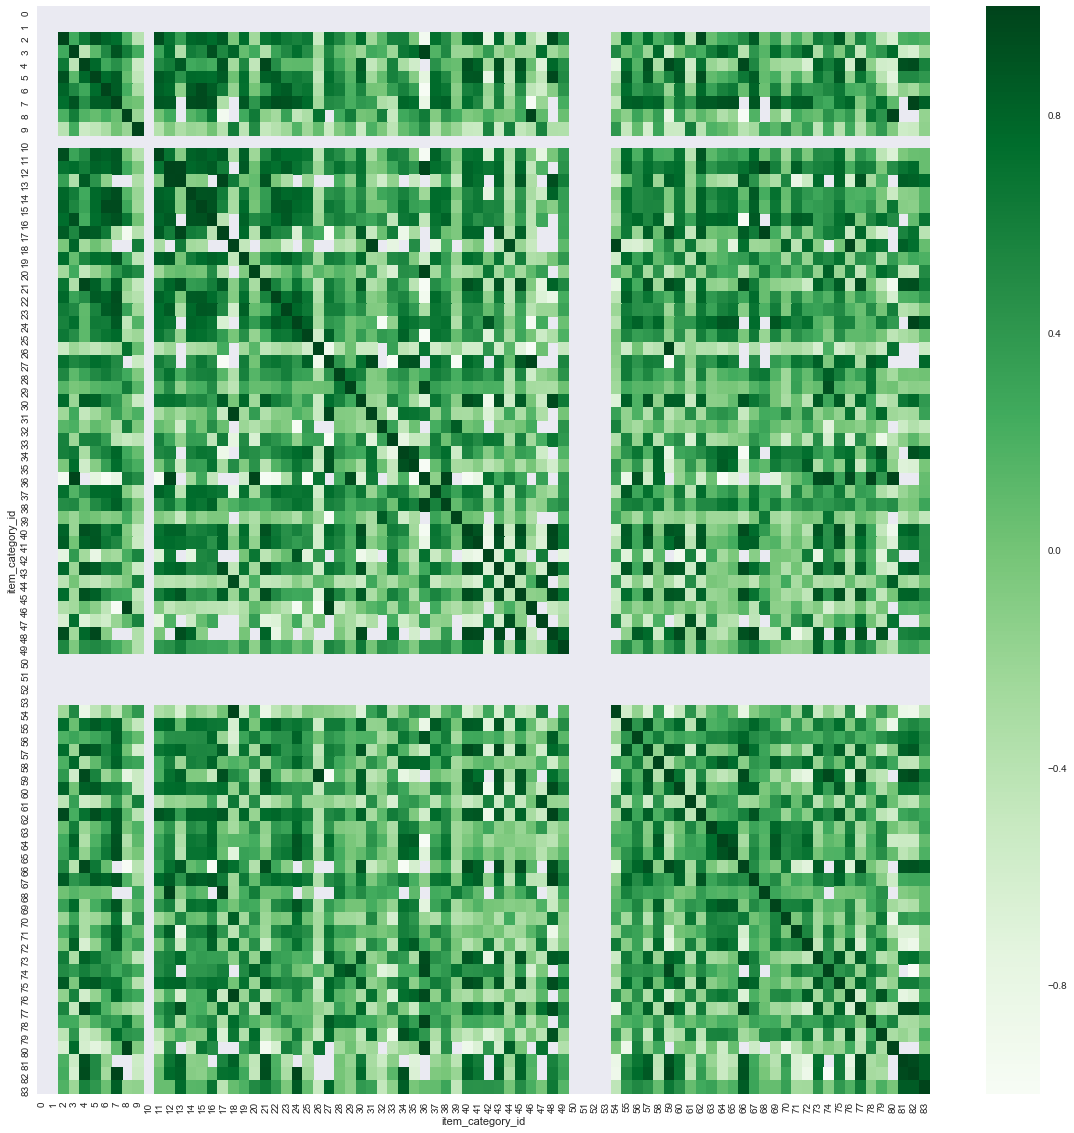

In [88]:
sns.heatmap(cate_corr_matrix, cmap='Greens')

Seems like the categories with higher correlations cluster to some close IDs. The ID range of correlated categories is about 7x7.